time1: 0.44307875633239746


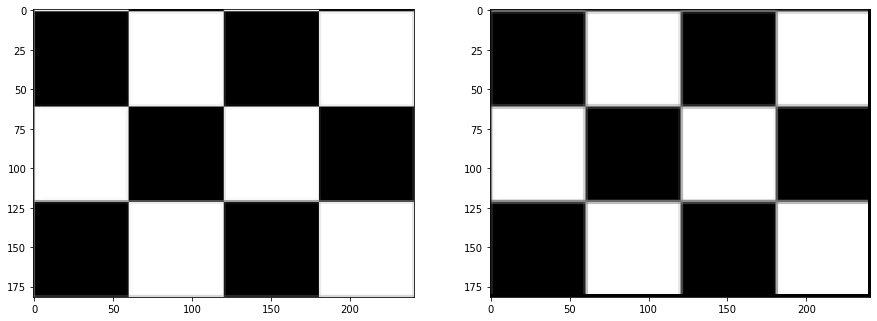

time2: 0.010849714279174805


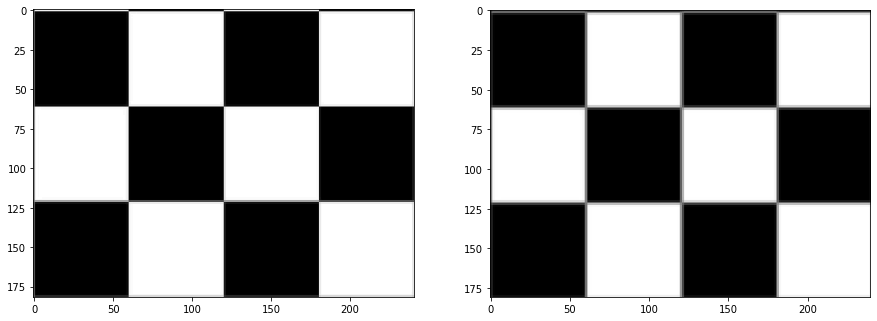

In [33]:
import time
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

def average_filt(im,k):
    orig_h,orig_w = im.shape
    
    avg_filter = np.ones((k,k),dtype = np.float32)
    avg_filter = avg_filter/(k**2)
    
    if k%2 == 1:
        pad = k//2
        pad_im = np.pad(im,(pad,pad),mode='constant')
    else:
        avg_filter = np.pad(avg_filter,(1,0),mode='constant')
        pad_im = im  
        
    kernel = np.flipud(np.fliplr(avg_filter))

    start_h = k//2
    start_w = k//2
#     print(orig_h,orig_w)
    
    new_h = (orig_h- k + 2*(k//2)) + 1
    new_w = (orig_w- k + 2*(k//2)) + 1
    output = np.zeros((new_h,new_w))
    i1=0
    for i in range(start_h,new_h - start_h):
        i2 = 0
        for j in range(start_w,new_w - start_w):
            cur = pad_im[(i-start_h):(i+start_h+1),(j-start_w):(j+start_w+1)]
            output[i1,i2] = np.sum(np.multiply(cur,kernel))
            i2=i2+1
        i1+=1    
            
    return output

def eff_avgfilt(im,k):
    orig_h,orig_w = im.shape
    
    avg_filter = np.ones((k,k),dtype = np.float32)
    avg_filter = avg_filter/(k**2)
    
    if k%2 == 1:
        pad = k//2
        pad_im = np.pad(im,(pad,pad),mode='constant')
#     else:
#         avg_filter = np.pad(avg_filter,(1,0),mode='constant')
#         pad_im = im
        
#     kernel = np.flipud(np.fliplr(avg_filter))
    mult_im = np.multiply((1/k**2),pad_im) 
    
    pad_h = pad_im.shape[0]
    pad_w = pad_im.shape[1]
    
    start_h = k//2
    start_w = k//2
    
    new_h = (orig_h - k + 2*(k//2)) + 1
    new_w = (orig_w - k + 2*(k//2)) + 1
#     output = np.zeros((new_h,new_w))

    
    sum_row = np.cumsum(mult_im,axis=1)
    row_minus = sum_row
    row_minus[:,0:k-1] = sum_row[:,0:k-1]
    row_minus[:,k:pad_w-1] = sum_row[:,k:pad_w-1] - sum_row[:,0:pad_w-1-k]
    sum_col = np.cumsum(row_minus,axis=0)
    col_minus = sum_col
    col_minus[0:k-1,:] = sum_col[0:k-1,:]
    col_minus[k:pad_h-1,:] = sum_col[k:pad_h-1,:] - sum_col[0:pad_h-1-k,:]
    output = col_minus[k-1:pad_h-1,k-1:pad_w-1]
    
    
#     i1=0
#     for i in range(start_h,new_h - start_h):
#         i2 = 0
#         for j in range(start_w,new_w - start_w):
#             cur = mult_im[(i-start_h):(i+start_h+1),(j-start_w):(j+start_w+1)]
#             col = np.sum(mult_im)
                
#             output[i1,i2] = np.sum(cur)
#             i2=i2+1
#         i1+=1    
#     print(col_minus)
    return output    

im = cv2.imread('../input/chess.jpg',0) 
im = np.array(im)
start_time1 = time.time()
output = average_filt(im,3)
end_time1 = time.time()
# print(output)
time1 = end_time1 - start_time1
print('time1:',time1)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im,'gray')
plt.subplot(1,2,2)
plt.imshow(output,'gray')
plt.show()

start_time2 = time.time()
output_eff = eff_avgfilt(im,3)
end_time2 = time.time()
time2 = end_time2 - start_time2
print('time2:',time2)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im,'gray')
plt.subplot(1,2,2)
plt.imshow(output_eff,'gray')
plt.show()


In [38]:
eff = []
non_eff = []
x_axis_k = np.arange(3,10,2)

import time
for k in range(3,10,2):
    start_time3 = time.time()
    output = average_filt(im,k)
    end_time3 = time.time()
    time3 = end_time3 - start_time3
    eff.append(time3)
    
    start_time6 = time.time()
    output_eff = eff_avgfilt(im,k)
    end_time6 = time.time()
    time6 = end_time6 - start_time6
    non_eff.append(time6)

# plt.figure()
# plt.plot(x_axis_k,eff)
# plt.plot(x_axis_k,non_eff)
# plt.show()

[0.5233500003814697, 0.47179484367370605, 0.7776000499725342, 1.103790044784546]


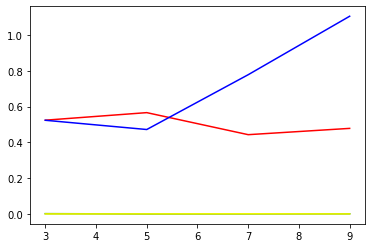

In [40]:
eff2 = []
non_eff2 = []
x_axis_k2 = np.arange(3,10,2)

import time
# img = cv2.imread('bell.jpg',0)

for k in range(3,10,2):
    start_time32 = time.time()
    output2 = average_filt(im,k)
    end_time32 = time.time()
    time32 = end_time32 - start_time32
    eff2.append(time32)
    
    start_time62 = time.time()
    output_eff2 = eff_avgfilt(im,k)
    end_time62 = time.time()
    time62 = end_time62 - start_time62
    non_eff2.append(time62)

print(eff2)
plt.figure()
plt.plot(x_axis_k,eff,color = 'r')
plt.plot(x_axis_k,non_eff,color = 'g')
plt.plot(x_axis_k2,eff2,color = 'b')
plt.plot(x_axis_k2,non_eff2,color = 'yellow')
plt.show()

In [44]:
# Efficient median 
import cv2
import numpy as np
def median_filt(degraded):
    
    h = degraded.shape[0]
    w = degraded.shape[1]
#     degraded = np.pad(degraded,(1,1),mode='constant')
    
    new_h = degraded.shape[0]
    new_w = degraded.shape[1]
    output = np.zeros((new_h,new_w,3))
#     kernel = np.flipud(np.fliplr(filt))
#     hsv = cv2.cvtColor(degraded, cv2.COLOR_BGR2HSV)
#     degraded = hsv
    for i in range(1,new_h-1):
        for j in range(1,new_w-1):
            values = []
#             values_g = []
#             values_b = []
            values = np.ravel(degraded[i-1:i+2,j-1:j+2])
#             values_g = np.ravel(degraded[i-1:i+2,j-1:j+2,1])
#             values_r = np.ravel(degraded[i-1:i+2,j-1:j+2,2])
            values.sort()
#             values_g.sort()
#             values_r.sort()
#             if i==1 and j==1:
#                 print(degraded[i-1:i+2][j-1:j+2])
            l = (len(values)//2)
            median = values[4]
#             median_g = values_g[4]
#             median_r = values_r[4]
            output[i,j] = median
#             output[i,j,1] = median_g
#             output[i,j,2] = median_r
            
#             output[i,j] = np.sum(degraded[j-1:j+2,i-1:i+2]*kernel)
#             output = cv2.cvtColor(output, cv2.COLOR_HSV2BGR)

    return output




def func(k,hist,pad_im,i,j,val):
#     print(hist.shape)
    
    intens =0
    for p in range(1,k-1):
        index = int(pad_im[j-2,i+p-2]+1)
        hist[0,index] = hist[0,index] - 1
#         index2 = int(pad_im[j-2+k,i+p-2-1])+1
        index2 = int(pad_im[j-2+k,i+p-2])+1
#         print(index2)
        hist[0,index2] = hist[0,index2] + 1
        

    summation = np.cumsum(hist,axis = 0)
    x = np.argwhere(summation < np.ceil(val))
    siz = x.shape[1]
    if siz != 0:
        intens = x[0,-1]
    return intens
        
def histogr(k,new_h,new_w,pad_im,output):
    hist = np.zeros((1,256))
#     print(hist)
#     output = np.zeros((h,w))
    val = np.ceil((k**2) / 2) 
    for i in range(new_w - k):
        for j in range(new_h - k):
            if j == 0:
                for p in range(1,k-1):
                    for q in range(1,k-1):
                        intens = 0
#                         val = np.ceil((k**2) / 2) 
                        ind = int(pad_im[j+q-2,i+p-2]) + 1
#                         print(ind)
                        hist[0,ind] = hist[0,ind] + 1
                        summation = np.cumsum(hist, axis =0)
                        
                        x = np.argwhere(summation <val)
                        siz = x.shape[1]
                        if siz != 0:
                            intens = x[0,-1]
                        output[j,i] = intens
            else:
                output[j,i] = func(k,hist,pad_im,i,j,val)
        hist = np.zeros((1,256))
    return output    



        
def eff_medianfilt(degraded,k):
    
    h,w = degraded.shape

#     print(h,w)
#     w = degraded.shape[1]
    
    output = np.zeros((h,w))
    pad = k//2
    
#     img = np.pad(img,(7//2,7//2),mode='constant')
    pad_im = np.zeros((2*pad+h,2*pad+w))
    pad_im[pad:h+pad,pad:w+pad] = degraded
    new_h = pad_im.shape[0]
    new_w = pad_im.shape[1]
    output = eff_avgfilt(degraded,k)
#     output = histogr(k,new_h,new_w,pad_im,output)
    
    return output



time1: 2.8930580615997314


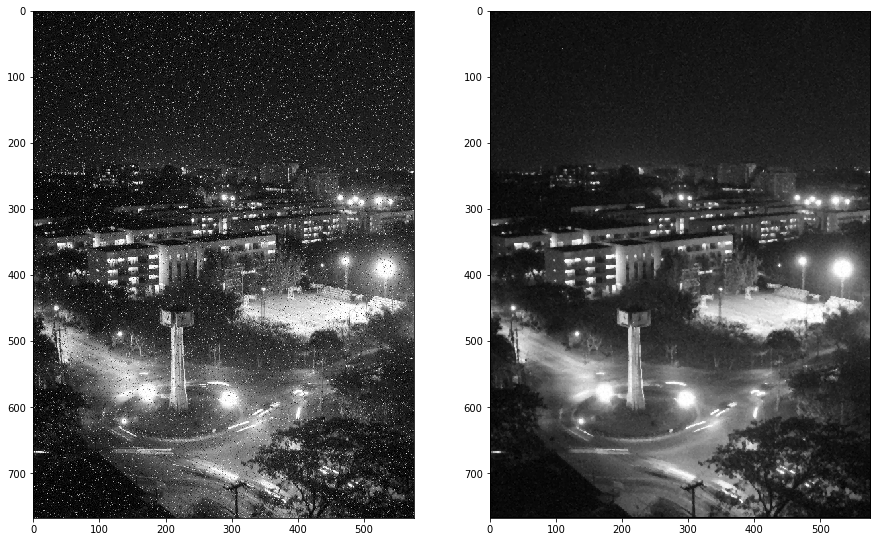

time2: 0.06534409523010254


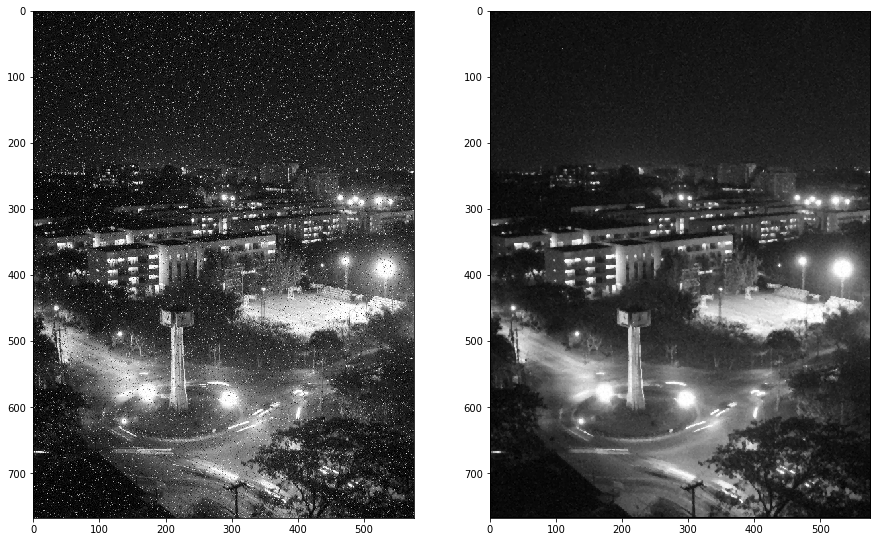

In [46]:
import time 
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

degraded = cv2.imread('../input/Degraded.jpg',0)








start_time1 = time.time()
output = median_filt(degraded)
cv2.normalize(output,output,0,255,cv2.NORM_MINMAX,dtype=-1)
output = output.astype(np.uint8)
end_time1 = time.time()
# print(output)
time1 = end_time1 - start_time1
print('time1:',time1)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(degraded,'gray')
plt.subplot(1,2,2)
plt.imshow(output,'gray')
plt.show()

start_time2 = time.time()
output_eff = eff_medianfilt(degraded,7)
end_time2 = time.time()
time2 = end_time2 - start_time2
print('time2:',time2)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(degraded,'gray')
plt.subplot(1,2,2)
plt.imshow(output,'gray')
plt.show()



In [52]:
eff = []
non_eff = []
x_axis_k = np.arange(3,10,2)

import time
for k in range(3,10,2):
    start_time3 = time.time()
    output = median_filt(degraded)
    end_time3 = time.time()
    time3 = end_time3 - start_time3
    eff.append(time3)
    
    start_time6 = time.time()
    output_eff = eff_medianfilt(degraded,k)
    end_time6 = time.time()
    time6 = end_time6 - start_time6
    non_eff.append(time6)

# plt.figure()
# plt.plot(x_axis_k,eff)
# plt.plot(x_axis_k,non_eff)
# plt.show()

[2.8954412937164307, 2.6604769229888916, 2.5739552974700928, 2.605962038040161]


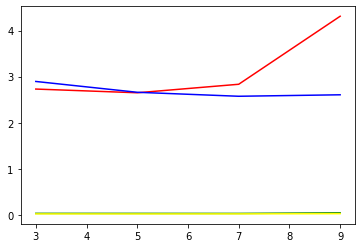

In [53]:
eff2 = []
non_eff2 = []
x_axis_k2 = np.arange(3,10,2)

import time
# img = cv2.imread('bell.jpg',0)

for k in range(3,10,2):
    start_time32 = time.time()
    output2 = median_filt(degraded)
    end_time32 = time.time()
    time32 = end_time32 - start_time32
    eff2.append(time32)
    
    start_time62 = time.time()
    output_eff2 = eff_medianfilt(degraded,k)
    end_time62 = time.time()
    time62 = end_time62 - start_time62
    non_eff2.append(time62)

print(eff2)
plt.figure()
plt.plot(x_axis_k,eff,color = 'r')
plt.plot(x_axis_k,non_eff,color = 'g')
plt.plot(x_axis_k2,eff2,color = 'b')
plt.plot(x_axis_k2,non_eff2,color = 'yellow')
plt.show()